<a href="https://colab.research.google.com/github/phnhung21/bacapstone/blob/main/Capstone_Project_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = "/content/cleaned_telco_data.csv"
data = pd.read_csv(file_path)

# 4. Data Exploration

In [4]:
data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Label,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,39.65,39.65,0.00,20,0.00,59.65,Churned,Yes,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,80.65,633.30,0.00,0,390.80,1024.10,Churned,Yes,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,95.45,1752.55,45.61,0,203.94,1910.88,Churned,Yes,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,98.50,2514.50,13.43,0,494.00,2995.07,Churned,Yes,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,76.50,2868.15,0.00,0,234.21,3102.36,Churned,Yes,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,21.15,1419.40,19.31,0,1639.44,3039.53,Stayed,No,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,84.80,1990.50,48.23,0,865.20,2807.47,Stayed,No,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,103.20,7362.90,45.38,0,2135.52,9453.04,Stayed,No,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,29.60,346.45,27.24,0,0.00,319.21,Stayed,No,NaN,NaN


In [ ]:
data.shape

(7043, 47)

1. Replace missing categorical values with 'Unknown'

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

2. Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to preserve the original
data_copy = data.copy()

# Encode categorical variables with LabelEncoder (simple numerical representation)
for col in data_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_copy[col] = le.fit_transform(data_copy[col])

print(data_copy)

      Customer ID  Gender  Age  Under 30  Senior Citizen  Married  Dependents  \
0            6207       1   78         0               1        0           0   
1            5305       0   74         0               1        1           1   
2            1129       1   71         0               1        0           1   
3            3208       0   78         0               1        1           1   
4            3419       0   80         0               1        1           1   
...           ...     ...  ...       ...             ...      ...         ...   
7038         1758       0   30         0               0        0           0   
7039         4853       1   38         0               0        1           1   
7040         1525       0   30         0               0        1           1   
7041         3367       0   32         0               0        1           1   
7042         2226       1   44         0               0        0           0   

      Number of Dependents 

3. Addresing Outliers by capping outliers at the 95th percentile for numeric columns

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    upper_limit = np.percentile(data[col], 95)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
    data_copy[col] = np.where(data_copy[col] > upper_limit, upper_limit, data_copy[col])

In [ ]:
# View class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(data_copy['Churn Label'].value_counts())

Class distribution before SMOTE:
Churn Label
0    5174
1    1869
Name: count, dtype: int64


4. Balancing target variable (Churn Label) to avoid bias for modelling

In [ ]:
target = 'Churn Label'
features = data_copy.drop(columns=[target], errors='ignore')
labels = data_copy[target]

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
features_balanced, labels_balanced = smote.fit_resample(features, labels)

In [ ]:
print(pd.Series(labels_balanced).value_counts())

Churn Label
1    5174
0    5174
Name: count, dtype: int64


In [ ]:
output_file = 'output_data.csv'
data_copy.to_csv(output_file, index=False)

# Visualizations

**What is the churn label distributions?**

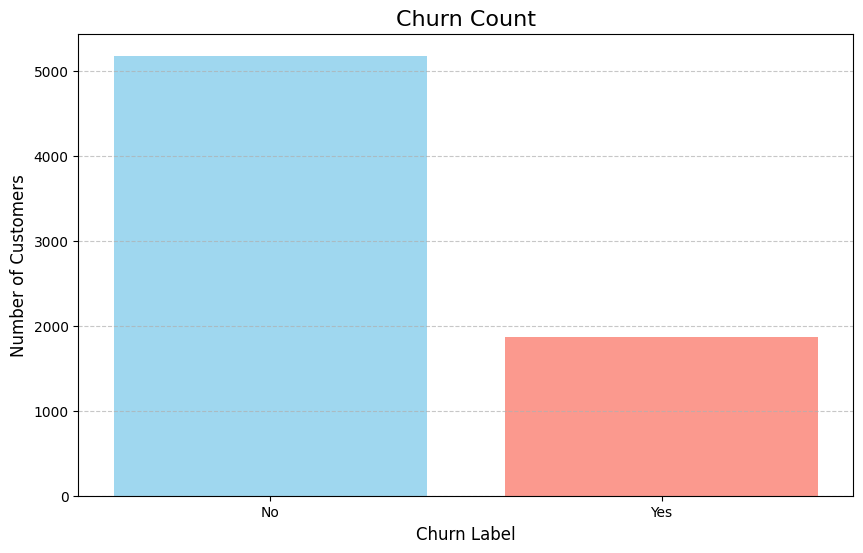

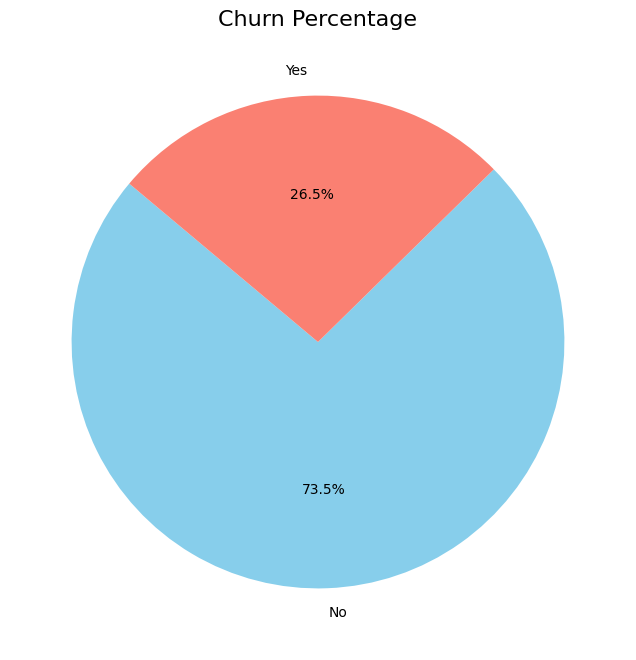

In [ ]:
# Calculate churn count and percentage
churn_count = data['Churn Label'].value_counts()
churn_percentage = data['Churn Label'].value_counts(normalize=True) * 100

# Create a bar plot for churn count
plt.figure(figsize=(10, 6))
plt.bar(churn_count.index, churn_count.values, color=['skyblue', 'salmon'], alpha=0.8)
plt.title("Churn Count", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("Churn Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a pie chart for churn percentage
plt.figure(figsize=(8, 8))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Churn Percentage", fontsize=16)
plt.show()

<ipython-input-88-dcd981584f87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Label", y="Monthly Charge", data=data, palette="viridis")


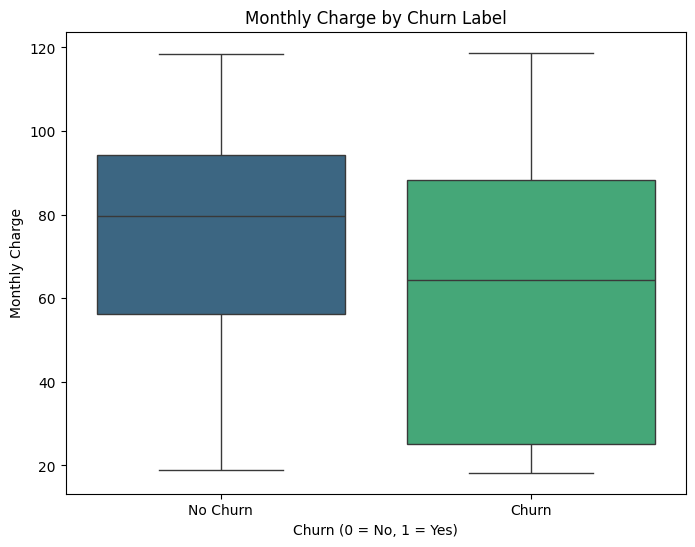

In [ ]:
# Plot Monthly Charge distribution by Churn Label
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn Label", y="Monthly Charge", data=data, palette="viridis")
plt.title("Monthly Charge by Churn Label")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charge")
plt.xticks([0, 1], labels=["No Churn", "Churn"])
plt.show()

# 5. Modelling - Decision Tree Model

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Drop unnecessary columns
decisiontree = data_copy.drop(columns=['Customer ID', 'Churn Reason', 'Churn Category', 'Customer Status', 'Country', 'State', 'City', 'Zip Code'])

# Define features and target
X = decisiontree.drop(columns=['Churn Label'])  # Drop 'Churn Label' to get feature matrix
y = decisiontree['Churn Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree with regularization
tree = DecisionTreeClassifier(
    max_depth=5,  # Limit the depth to reduce overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
tree.fit(X_train, y_train)

# Evaluate the model
y_pred = tree.predict(X_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores_rf = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print(f"Deicsion Tree Cross-Validation Mean Accuracy: {cv_scores_rf.mean():.2f}")
print(f"Decision Tree Cross-Validation Standard Deviation: {cv_scores_rf.std():.2f}")


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1009
           1       0.78      0.48      0.60       400

    accuracy                           0.81      1409
   macro avg       0.80      0.71      0.74      1409
weighted avg       0.81      0.81      0.80      1409

Confusion Matrix:
[[954  55]
 [207 193]]
Deicsion Tree Cross-Validation Mean Accuracy: 0.80
Decision Tree Cross-Validation Standard Deviation: 0.02


The decision tree analysis reveals significant insights into customer churn patterns. The model achieved an accuracy of 81%, effectively predicting both churned and non-churned customers.

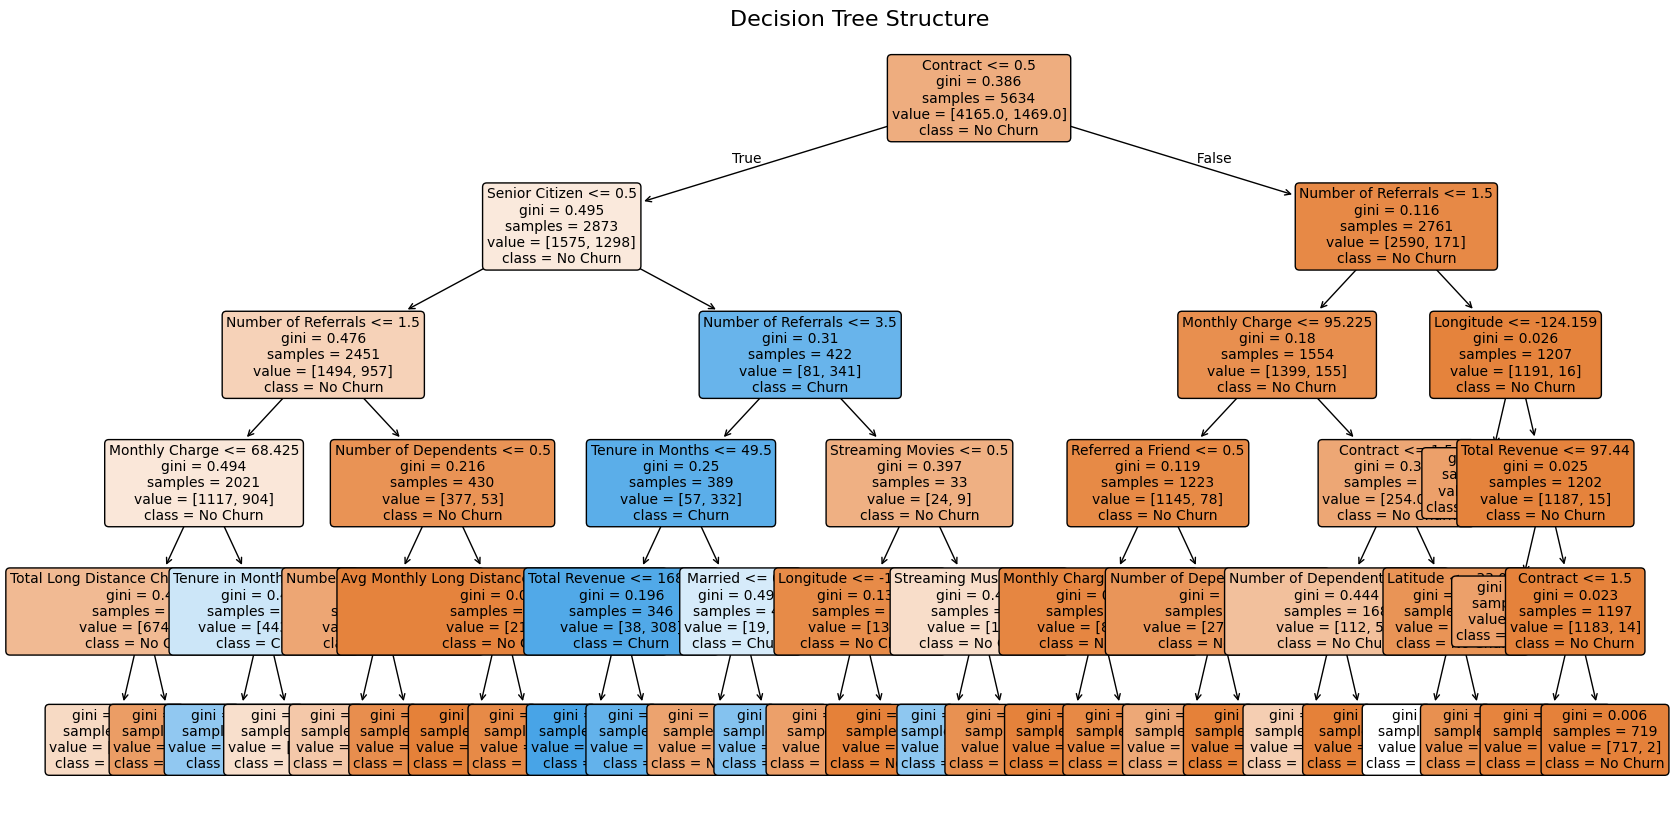

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure", fontsize=16)
plt.show()

 The feature importance analysis highlights Contract Type as the most influential factor, with short-term contracts (e.g., month-to-month) being strongly associated with higher churn rates. This aligns with the expectation that customers without long-term commitments are more likely to switch providers. Other significant features include Senior Citizen Status, where older customers are more prone to churn, likely due to changing needs or limited service use. Number of Referrals also emerged as a key predictor, with higher referrals indicating stronger customer engagement and lower churn likelihood. Additionally, Monthly Charges play a vital role, as higher charges can lead to dissatisfaction and increased churn risk.

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top Features Influencing the Model:")
print(feature_importance_df.head(10))

Top Features Influencing the Model:
                        Feature  Importance
29                     Contract    0.498176
3                Senior Citizen    0.143741
12          Number of Referrals    0.129078
32               Monthly Charge    0.097027
13             Tenure in Months    0.051278
36  Total Long Distance Charges    0.029493
6          Number of Dependents    0.026808
11            Referred a Friend    0.005776
4                       Married    0.005619
27              Streaming Music    0.003761


# 5. Modelling - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Train a Random Forest model
random_forest = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Limit depth for better interpretability
    random_state=42
)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluation
print("Random Forest Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Cross-validation
cv_scores_rf = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Mean Accuracy: {cv_scores_rf.mean():.2f}")
print(f"Random Forest Cross-Validation Standard Deviation: {cv_scores_rf.std():.2f}")


Random Forest Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1009
           1       0.79      0.63      0.70       400

    accuracy                           0.85      1409
   macro avg       0.83      0.78      0.80      1409
weighted avg       0.84      0.85      0.84      1409

Random Forest Confusion Matrix:
[[944  65]
 [149 251]]
Random Forest Cross-Validation Mean Accuracy: 0.78
Random Forest Cross-Validation Standard Deviation: 0.10


# 5. Modelling - Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a neural network (MLPClassifier)
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]

print("Classification Report for NN:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cv_scores = cross_val_score(nn_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Cross-Validation Standard Deviation: {cv_scores.std():.2f}")

Classification Report for NN:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1009
           1       0.78      0.48      0.60       400

    accuracy                           0.81      1409
   macro avg       0.80      0.71      0.74      1409
weighted avg       0.81      0.81      0.80      1409

Confusion Matrix:
[[954  55]
 [207 193]]
Cross-Validation Mean Accuracy: 0.71
Cross-Validation Standard Deviation: 0.09


# 5. Modelling - Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 4: Train the Gradient Boosting Model
gradient_boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gradient_boosting.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = gradient_boosting.predict(X_test)

print("Classification Report for GBC:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cv_scores = cross_val_score(gradient_boosting, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Cross-Validation Standard Deviation: {cv_scores.std():.2f}")

Classification Report for GBC:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1009
           1       0.78      0.67      0.72       400

    accuracy                           0.85      1409
   macro avg       0.82      0.79      0.81      1409
weighted avg       0.85      0.85      0.85      1409

Confusion Matrix:
[[932  77]
 [134 266]]
Cross-Validation Mean Accuracy: 0.76
Cross-Validation Standard Deviation: 0.13


In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gradient_boosting.feature_importances_
}).sort_values(by='Importance', ascending=False)
filtered_features = feature_importance_df[feature_importance_df["Importance"] > 0.01]

# Normalize the importance scores so they sum to 1
filtered_features["Normalized_Importance"] = (
    filtered_features["Importance"] / filtered_features["Importance"].sum()
)

# Display the normalized features
print(filtered_features)

                              Feature  Importance  Normalized_Importance
29                           Contract    0.300066               0.324308
12                Number of Referrals    0.087567               0.094641
32                     Monthly Charge    0.084683               0.091525
1                                 Age    0.070498               0.076194
13                   Tenure in Months    0.064386               0.069588
7                            Latitude    0.044968               0.048601
37                      Total Revenue    0.036755               0.039724
8                           Longitude    0.031480               0.034023
6                Number of Dependents    0.031039               0.033547
9                          Population    0.026606               0.028755
36        Total Long Distance Charges    0.025837               0.027924
3                      Senior Citizen    0.021657               0.023406
33                      Total Charges    0.021569  

<ipython-input-107-df1399ca6c87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features["Normalized_Importance"] = (



Based on the comparison, the Gradient Boosting Classifier (GBC) stands out as the best-performing model due to its high accuracy (85%, macro average F1-score (0.81), and weighted average F1-score (0.85), indicating superior overall performance across both classes. Additionally, GBC achieved the highest recall for Class 1 (0.67), which is critical for minimizing false negatives in imbalanced datasets. While the Decision Tree demonstrated stability with the lowest cross-validation standard deviation (0.02), its overall metrics, including recall and F1-score, fall short compared to GBC. Therefore, GBC offers the best balance between precision, recall, and generalization, making it the most suitable model for this task.